<a href="https://colab.research.google.com/github/dwardo4321/Mathematical-Optimisation/blob/main/Simplex_method_and_Graphical_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install gekko
%pip install matplotlib
%pip install numpy
# from google.colab import sheets
# sh = sheets.InteractiveSheet()
# df = sh.as_df()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 49.9 MB/s eta 0:00:00


**Simplex Method for Linear Optimisation: Question 1**

In [119]:
#solve LP
from gekko import GEKKO
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=0)
m.Equations([6*x+4*y<=24,
             x+2*y<=6,
             -x+y<=1,
             y<=2])
m.Maximize(x+y)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 3.0 y: 1.5 obj: 4.5


**Visualisation**

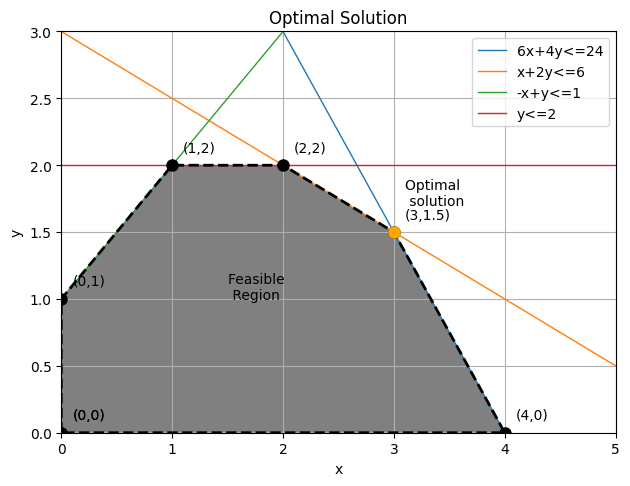

In [120]:
import numpy as np
import matplotlib.pyplot as plt
#visualize solution
# Plot the optimal solution
x = np.arange(0, 100)
plt.plot(x, 6 - (3/2) * x, label = r'6x+4y<=24',linewidth=1)
plt.plot(x, 3 - 0.5 * x, label= r'x+2y<=6',linewidth=1)
plt.plot(x, 1 + x, label = r'-x+y<=1',linewidth=1)
plt.plot(x, 2 * np.ones_like(x), label = 'y<=2',linewidth=1)
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=8,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
plt.plot([xopt], [yopt], marker='o', color='orange', markersize=8)
plt.fill(xv, yv, 'grey')

plt.xlabel('x') ;plt.ylabel('y')
plt.xlim(0,5)   ;plt.ylim(0,3)   ;plt.grid(True)   ;plt.tight_layout() # Can also use plt.axis([0, 5, 0, 4])
plt.title('Optimal Solution')
plt.text(1.5, 1, 'Feasible \n Region', size = '10')
plt.annotate('Optimal \n solution', xy = (3.1, 1.7), size = '10')

plt.legend()
plt.show()

**Simplex: Question 2**

In [121]:
from gekko import GEKKO

m = GEKKO(remote=False)  # Initialize gekko
x, y = m.Array(m.Var, 2, lb=0)
m.Maximize(10 * x + 7 * y)
m.Equation(2 * x + 1 * y <= 5000)
m.Equation(4 * x + 5 * y <= 15000)
m.Equation(y <= 2000)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)
# print solution
print(f'Optimal solution: G = {x.value[0]:.2f}, H = {y.value[0]:.2f}')
print(f'Maximum profit = ${-m.options.objfcnval:.2f}')

x: 1666.6666667 y: 1666.6666667 obj: 28333.333333
Optimal solution: G = 1666.67, H = 1666.67
Maximum profit = $28333.33


**Visualisation**

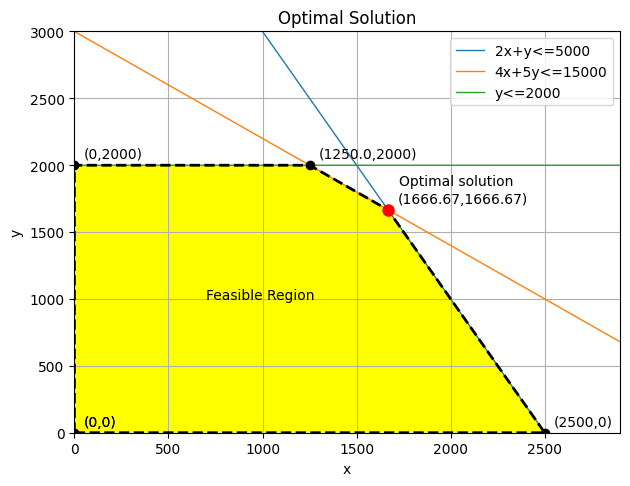

In [122]:
import numpy as np
import matplotlib.pyplot as plt
#visualize solution
# Plot the optimal solution
x = np.arange(0, 100000)
plt.plot(x, 5000 - 2 * x, label = r'2x+y<=5000',linewidth=1)
plt.plot(x, 3000 - (4/5) * x, label= r'4x+5y<=15000',linewidth=1)
plt.plot(x, 2000 * np.ones_like(x), label = 'y<=2000',linewidth=1)
xv = [0, 0, round(2500/2,2), round(10000/6,2), 2500, 0]; yv = [0, 2000, 2000, round(5000-10000/3,2), 0,0]
plt.plot(xv,yv,'ko--',markersize=6,linewidth=2)
plt.fill(xv,yv, 'yellow')
for i in range(len(xv)):
    plt.text(xv[i]+50,yv[i]+50,f'({xv[i]},{yv[i]})')
plt.plot([xopt],[yopt], marker = 'o', markersize = 8, color = 'red')

plt.xlim(0,2900)   ;plt.ylim(0,3000)
plt.xlabel('x') ;plt.ylabel('y')
plt.grid(True)   ;plt.tight_layout()
plt.title('Optimal Solution')
plt.text(700, 1000, 'Feasible Region', size = 10)
plt.annotate('Optimal solution', xy = (1725, 1850), size = 10)

plt.legend()
plt.show()